# LEGO Regression Project

## Introduction 

In this notebook a simple linear regression analysis is performed and reported the findings of the model, including both predictive model performance metrics and interpretation of fitted model parameters.


# Task: Develop a LEGO Pricing Algorithm

![pile of legos](images/legos.jpg)

Photo by <a href="https://unsplash.com/@xavi_cabrera?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Xavi Cabrera</a> on <a href="/s/photos/lego?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm in order to analyze the value of individual lego pieces.

The primary purpose of this algorithm is *inferential*, meaning that **the model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. We will apply knowledge of statistics to include appropriate caveats about these relationships.

## Data Understanding

You have been given access to an sql database containing over 700 LEGO sets released in the past, including attributes of those sets as youll as their prices.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

## Loading the Data

The entity relational diagram (E.R.D) for the legos database is displayed below. 

![Entity Relational Diagram](images/erd.png)

In [7]:
# Run this cell without changes
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!ls data

legos.db


In [9]:
# Replace None with your code

connection = sqlite3.connect('data/legos.db')

sql_query = """
SELECT *
FROM difficulty
JOIN product_info
    USING("Prod Id")
JOIN metrics
    USING("Prod Id")
"""

df = pd.read_sql(sql_query, connection)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod Id           884 non-null    int64  
 1   Min Age           884 non-null    float64
 2   Max Age           884 non-null    float64
 3   Difficulty Level  884 non-null    int64  
 4   Set Name          884 non-null    object 
 5   Prod Desc         864 non-null    object 
 6   Theme Name        884 non-null    object 
 7   Piece Count       884 non-null    int64  
 8   Num Reviews       781 non-null    float64
 9   Star Rating       781 non-null    float64
 10  List Price        844 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.1+ KB


## Analysis Requirements

### 1. Data Exploration and Cleaning

During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases) should be dropped. 

### 2. Create a Baseline Model

In order to evaluate how a simple linear regression model is understanding the dependent variable, we will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of `list_price` can be considered a highly naive model. If our simple linear regression model performs worse than this naive approach, we can safely say that it is not a very good model. 

### 3. Interpret a Correlation Heatmap

To develop a simple linear regression model, we will identify the independent variable that is most correlated with our dependent variable. To do this this we will plot a correlation heatmap to identify the variable most correlated with `list_price`.

### 4. Build a Simple Linear Regression Model

Now, create a linear regression model using the `statsmodels` library where the most correlated feature is used as the independent variable and the dependent variable is properly set. 

### 5. Interpret the Simple Linear Regression Model

Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted.

### 6. Evaluate the Simple Linear Regression Model

Before making a final assessment of our model, need to compare its metrics with the baseline model created in step one and need to check the assumptions of linear regression.


# 1. Data Exploration and Cleaning

Inspect the dataframe by outputting the first five rows.

In [11]:
df.head(5)

,Prod Id,Min Age,Max Age,Difficulty Level,Set Name,Prod Desc,Theme Name,Piece Count,Num Reviews,Star Rating,List Price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99


Produce high-level descriptive information about your training data

In [12]:
df.describe()

,Prod Id,Min Age,Max Age,Difficulty Level,Piece Count,Num Reviews,Star Rating
count,8.840000e+02,884.000000,884.000000,884.000000,884.000000,781.000000,781.000000
mean,5.821184e+04,6.781674,27.785068,1.483032,460.990950,17.610755,4.430602
std,1.388029e+05,2.984551,34.019566,0.796898,928.905788,38.143280,0.592083
min,6.300000e+02,1.500000,3.000000,0.000000,1.000000,1.000000,1.800000
25%,2.113875e+04,5.000000,12.000000,1.000000,88.750000,2.000000,4.100000
50%,4.550550e+04,7.000000,14.000000,2.000000,185.500000,6.000000,4.600000
75%,7.122825e+04,8.000000,14.000000,2.000000,457.750000,13.000000,4.900000
max,2.000431e+06,16.000000,99.000000,4.000000,7541.000000,367.000000,5.000000


Display the number of null values for each column

In [13]:
df.isna().sum()

Prod Id               0
Min Age               0
Max Age               0
Difficulty Level      0
Set Name              0
Prod Desc            20
Theme Name            0
Piece Count           0
Num Reviews         103
Star Rating         103
List Price           40
dtype: int64

There are four columns that contain null values. Of those four, `List Price`, which is your dependent variable, is probably the most concerning. 

Hence in the cell below, dropping all rows where `List Price` is null.

In [14]:
df = df.dropna(subset=['List Price'])
df.isna().sum()

Prod Id              0
Min Age              0
Max Age              0
Difficulty Level     0
Set Name             0
Prod Desc           20
Theme Name           0
Piece Count          0
Num Reviews         95
Star Rating         95
List Price           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 882
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod Id           844 non-null    int64  
 1   Min Age           844 non-null    float64
 2   Max Age           844 non-null    float64
 3   Difficulty Level  844 non-null    int64  
 4   Set Name          844 non-null    object 
 5   Prod Desc         824 non-null    object 
 6   Theme Name        844 non-null    object 
 7   Piece Count       844 non-null    int64  
 8   Num Reviews       749 non-null    float64
 9   Star Rating       749 non-null    float64
 10  List Price        844 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 79.1+ KB


To make things easier moving forward, in the cell below, reformatted the column names so spaces have been replaced with underscores and the text has been lowered

In [16]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['prod_id', 'min_age', 'max_age', 'difficulty_level', 'set_name',
       'prod_desc', 'theme_name', 'piece_count', 'num_reviews', 'star_rating',
       'list_price'],
      dtype='object')

To ensure columns are correctly reformatted, below assert statement is executed

In [17]:
assert 'min_age' in df.columns

Check the datatypes of the columns in the dataframe. 
> Remember, the target column and any columns you use as independent variables *must* have a numeric datatype. After inspecting the datatypes of the columns, convert columns to numeric where necessary. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 882
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           844 non-null    int64  
 1   min_age           844 non-null    float64
 2   max_age           844 non-null    float64
 3   difficulty_level  844 non-null    int64  
 4   set_name          844 non-null    object 
 5   prod_desc         824 non-null    object 
 6   theme_name        844 non-null    object 
 7   piece_count       844 non-null    int64  
 8   num_reviews       749 non-null    float64
 9   star_rating       749 non-null    float64
 10  list_price        844 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 79.1+ KB


In [19]:
df['list_price'] = df['list_price'].str.replace("$", "").astype(float)
df['list_price']

/var/folders/w8/mkthfjr50j5fw8q817j278c80000gn/T/ipykernel_3064/637004485.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['list_price'] = df['list_price'].str.replace("$", "").astype(float)


0      49.990
1      30.362
2      19.990
3      34.990
4      19.990
        ...  
877     9.990
878     9.990
879     9.990
880    19.990
882    19.990
Name: list_price, Length: 844, dtype: float64

In the cell below, output the number of duplicate rows in the dataframe. If duplicates are found, drop them.

In [20]:
duplicatedRows = df[df.duplicated()].count()
duplicatedRows

prod_id             100
min_age             100
max_age             100
difficulty_level    100
set_name            100
prod_desc           100
theme_name          100
piece_count         100
num_reviews          94
star_rating          94
list_price          100
dtype: int64

In [21]:
df = df.drop_duplicates()
df.shape

(744, 11)

Visualize the distribution of the dependent variable

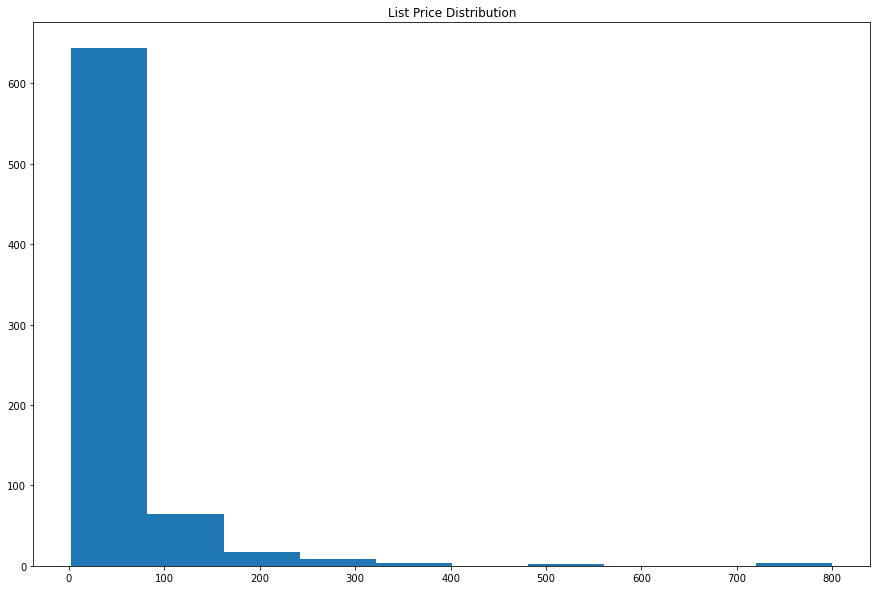

In [35]:
fig, axis = plt.subplots(figsize=(15,10))

plt.hist(df['list_price'])
plt.title('List Price Distribution')
plt.show()

# Create a Baseline Model

Below, create a baseline model. 

To do this we must:

1. Calculate the mean of the `list_price` column in the `train` dataframe.
2. Now that we have calculated the mean of `list_price`, creating a list with the same length as the `list_price` column where every value in the list is the calculated mean.
    - Store this list in the variable `baseline_preds`.

In [23]:
# Calculate the mean of the list_price column in the train dataframe.
mean = df['list_price'].mean()
mean

# Create a list with the same length as the list_price column 
# where every value in the list is the calculated mean.
baseline_preds = []

for i in range(0, len(df['list_price'])):
    baseline_preds.append(mean)

print(mean)

49.00058198924769


Now that we have baseline predictions, we can use the predictions to calculate metrics about the model's performance. 

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(df.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False
baseline_rmse = mean_squared_error(df.list_price, baseline_preds, squared=False)


print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)

Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442


**Interpret the resulting metrics for the baseline model.**

- How is the model explaining the variance of the dependent variable?
- On average, how many dollars off are the models predictions?

- As the R2-Squared value is 0, it is not a good fit
- Based on the RMSE value of 73.60, on average its $24 off on this model prediction

# 2. Interpret a Correlation Heatmap to Build a Baseline Model

## Correlation Heatmap

Produce a heatmap showing the correlations between all of the numeric values in the data. The x and y axis labels should indicate the pair of values that are being compared, and then the color and the number should represent the correlation. 

The most important column or row shows the correlations betyouen the target (listing price) and other attributes.

In [36]:
import seaborn as sns
import numpy as np

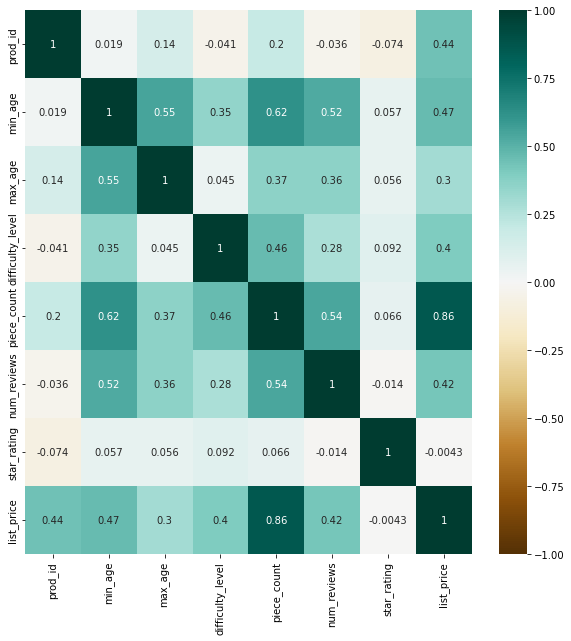

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

<AxesSubplot:>

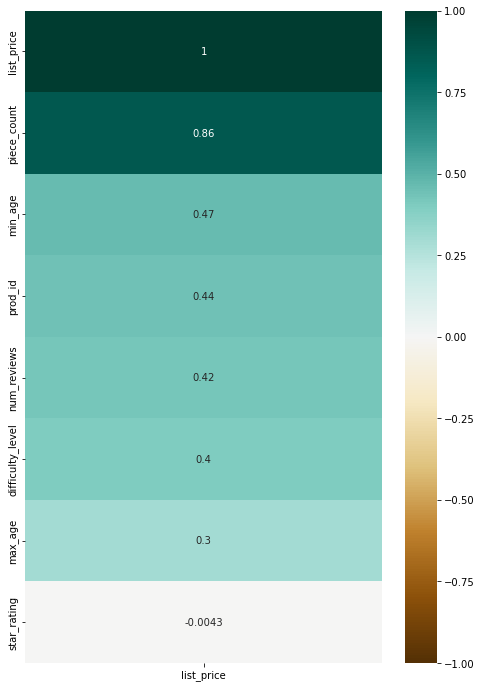

In [37]:
plt.figure(figsize=(8, 12))
sns.heatmap(df.corr()[['list_price']].
                      sort_values(by='list_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Based on the heatmap, the feature that is most strongly correlated with the target (`list_price`) is piece_count.

In [38]:
most_correlated_feature = df['piece_count']

Create a scatter plot of that feature vs. listing price:

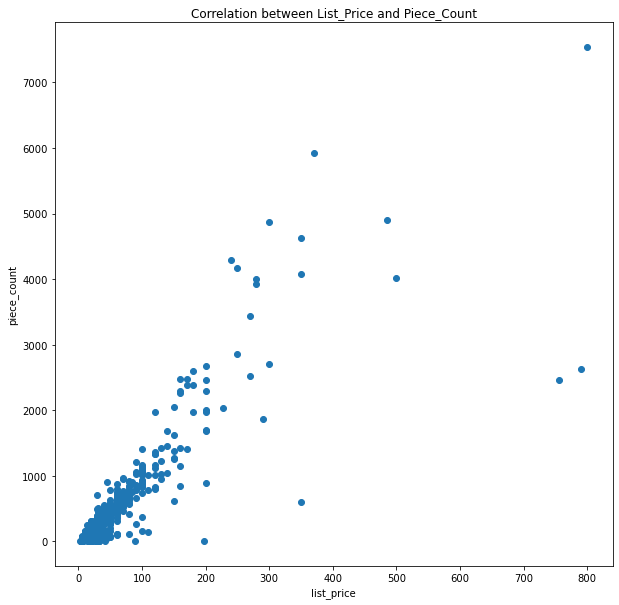

In [29]:
fig,ax = plt.subplots(figsize=(10, 10))
ax = plt.scatter(df['list_price'], most_correlated_feature)
plt.title('Correlation between List_Price and Piece_Count')
plt.xlabel('list_price')
plt.ylabel('piece_count')
plt.show()

# 3. Build a Simple Linear Regression Model

Now, we will build a linear regression model using just that feature. 

In the cell below, fit a statsmodels linear regression model to the data and output a summary for the model. 

In [39]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

f = 'list_price~piece_count'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2141.
Date:                Wed, 18 May 2022   Prob (F-statistic):          6.91e-221
Time:                        22:09:23   Log-Likelihood:                -3749.0
No. Observations:                 744   AIC:                             7502.
Df Residuals:                     742   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4565      1.593      7.192      0.000       8.329      14.584
piece_count     0.0875      0.002     46.273      0.000       0.084       0.091
==============================================================================
Omnibus:                     1141.526   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464258.231
Skew:                           8.756   Prob(JB):                         0.00
Kurtosis:                     124.117   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Interpret the Simple Linear Regression Model

Now that the model has been fit, we should interpret the model parameters. 

Specifically:
#### What do the coefficients for the intercept and independent variable suggest about the dependent variable?
   The data means the value of list_price increases by 0.0875 for each unit increase in the piece count 
#### Are the coefficients found to be statistically significant?
   As p value is 0, it implies high significance
#### What are the confidence intervals for the coefficients?
   Statistics suggests that 95% confident the population mean lies within the range of 0.084 and 0.091
    
#### Do the relationships found by the model seem plausible? 
   Yes model suggests there is a relationship between chosen dependent and independent variable

#### Other Observations :

Given R-Squared is 0.743, 74% of the variation in dependent variable is explained by independent variable in our model

# 5. Evaluate the Simple Linear Regression Model

Now that the model parameters have been interpreted, the model must be assessed based on predictive metrics and whether or not the model is meeting the assumptions of linear regression. 

### Compare the $R^2$ and the Root Mean Squared Error of the simple linear regression model with the baseline model. 

In [31]:
model_r2 = r2_score(df['list_price'], model.predict())
# model_r2 = model.rsquared

# model_rmse = np.sqrt(model.mse_model)

model_rmse = mean_squared_error(df.list_price, model.predict(), squared=False)
# model_rmse = np.sqrt(model_rmse)


print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('----------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442
----------------------------
Regression R^2:  0.7426440497844149
Regression RMSE: 37.33856230937886


### Interpret the model metrics

#### Comparison of R-Squared between Baseline and Linear Regression Model :

    R-Squared value of 0 derived from Baseline explains  a poor fit between target and response variable whereas Linear model predicts 73% of variations in list_price variable are explained by piece_count.
    
#### Comparison of RMSE between Baseline and Linear Regression Model :

    As Linear model has lower RMSE compared to Baseline, it seems to be best fit of the give dataset

### Check the assumptions of simple linear regression

#### Investigating Linearity

First, let's check whether the linearity assumption holds.

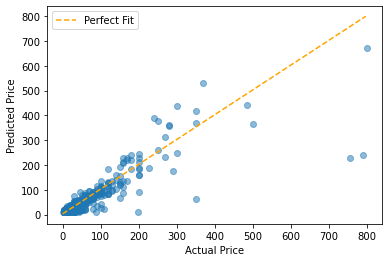

In [32]:
# Run this cell without changes

preds = model.predict()
fig, ax = plt.subplots()

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are you violating the linearity assumption?

It appears to exists linear relationship between two variables except that outliers presence may introduce bias.

#### Investigating Normality

Now let's check whether the normality assumption holds for our model.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


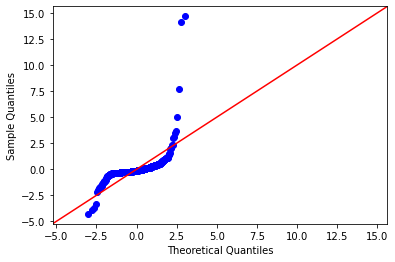

In [33]:
# Run this code without changes
import scipy.stats as stats
import statsmodels.api as sm

residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are you violating the normality assumption?

As the residuals lie around 45-degree line, it suggests that residuals are normally distributed.

#### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

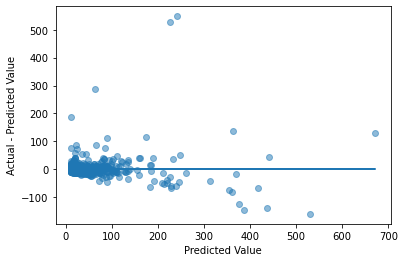

In [34]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are you violating the homoscedasticity assumption?

The scatterplot illustrates homoscedasticity in the data as its not following any particular pattern though we have outliers in the data that are scatterd out of the expected range.

### Linear Regression Assumptions Conclusion

Given p value is 0, it lead us to reject null hypothesis and conclude that there is relationship between list_price and piece_count. The regression coefficient represents that list_price increases by 0.0875 with each unit increase in the piece_count variable. The coefficient of determination suggests that 74.3% of variance in list_price can be explained by piece_count alone. 

Although linear assumptions are not perfect, model can be reassesed by removing outliers to compare if its improves performance of model fitness to predict better outcomes.